In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv("ford.csv")
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
data.shape

(17966, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [5]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [6]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [8]:
data["model"].value_counts()

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

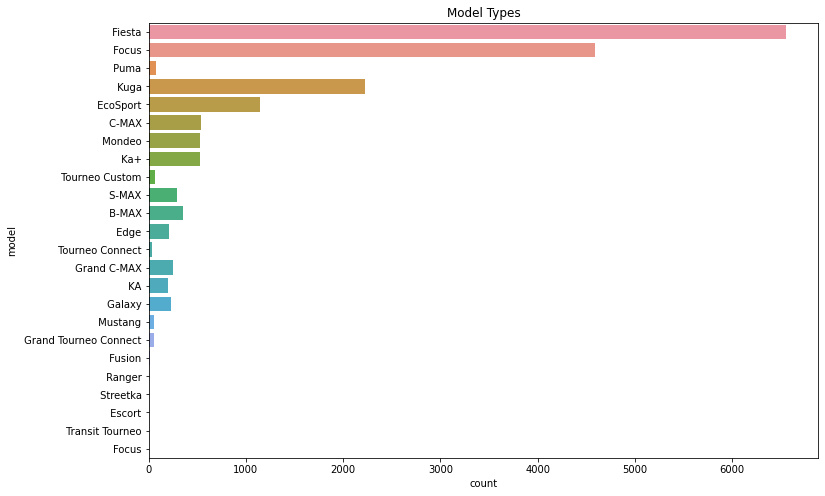

In [9]:
plt.figure(figsize=(12 , 8))
sns.countplot(data=data , y ="model" )
plt.title("Model Types")
plt.show()

In [10]:
data["transmission"].value_counts()

Manual       15518
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64

<AxesSubplot:xlabel='transmission', ylabel='count'>

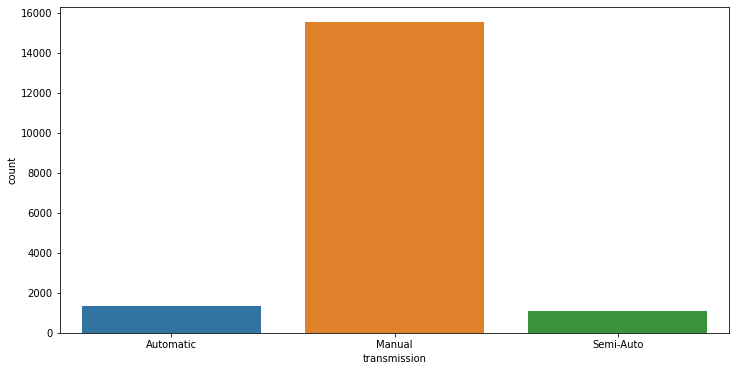

In [11]:
plt.figure(figsize=(12 , 6))
sns.countplot(x="transmission" , data=data)

In [12]:
data["fuelType"].value_counts()

Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

<AxesSubplot:xlabel='fuelType', ylabel='count'>

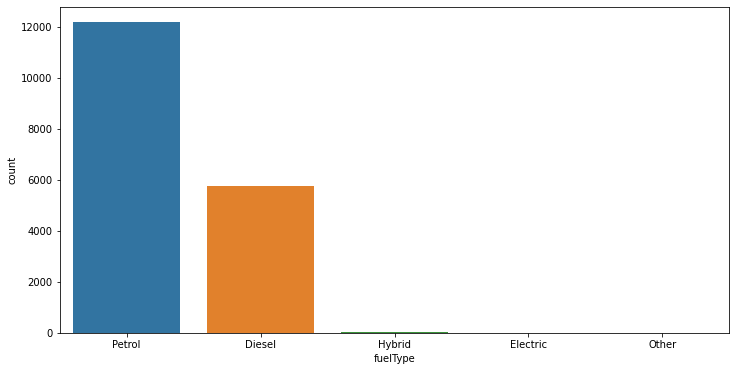

In [13]:
plt.figure(figsize=(12 , 6))
sns.countplot(data=data , x ="fuelType")

In [14]:
data["engineSize"].value_counts()

1.0    7765
1.5    3418
2.0    3311
1.2    1626
1.6     923
1.1     559
1.4     112
2.3      80
0.0      51
5.0      45
1.8      35
2.2      13
2.5      13
1.3      13
3.2       1
1.7       1
Name: engineSize, dtype: int64

<AxesSubplot:xlabel='engineSize', ylabel='count'>

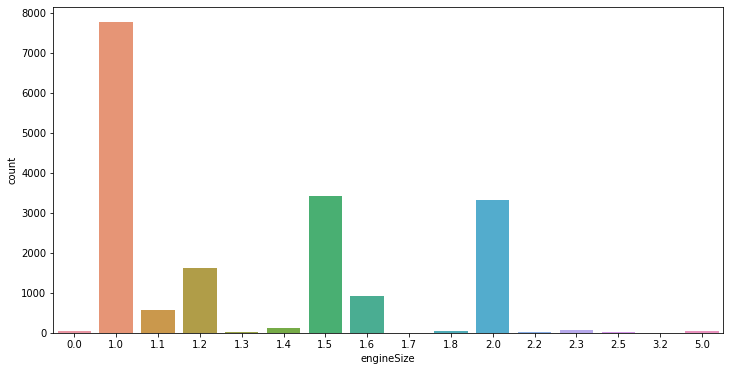

In [15]:
plt.figure(figsize=(12 ,6))
sns.countplot(x = "engineSize" , data=data)

<AxesSubplot:xlabel='transmission', ylabel='price'>

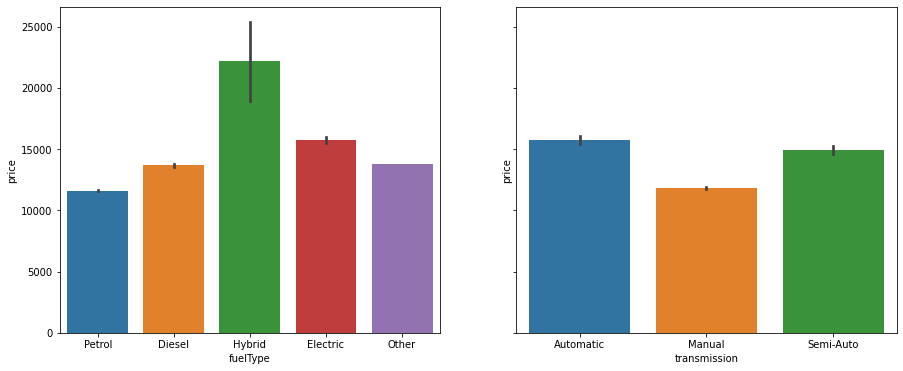

In [16]:
fuletype = data["fuelType"]
tranmission = data["transmission"]
model = data["model"]
price = data["price"]

fig , axes = plt.subplots(1,2, figsize=(15 , 6) , sharey=True)
sns.barplot(x = fuletype , y = price, ax=axes[0])
sns.barplot(x = tranmission , y = price, ax=axes[1])

<AxesSubplot:xlabel='price', ylabel='model'>

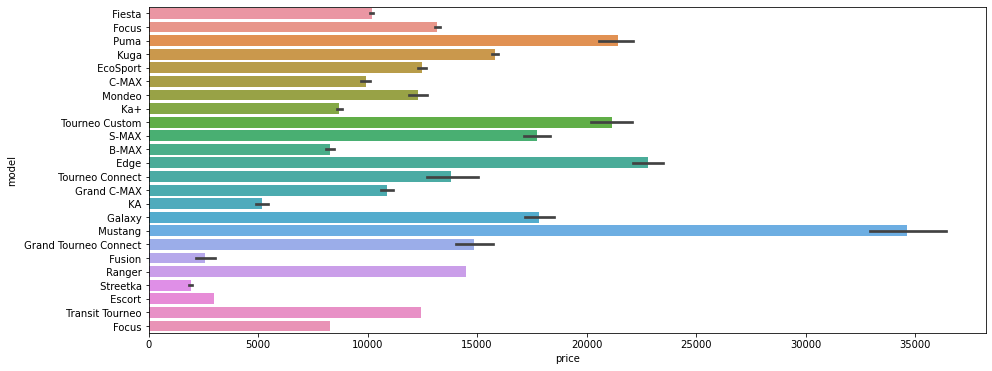

In [17]:
plt.figure(figsize=(15 , 6))
sns.barplot(y = model , x = price)

In [18]:
data.replace({'transmission': {"Automatic": 0 , "Manual":1 , "Semi-Auto":2}} , inplace=True)

In [19]:
data.replace({"fuelType": {"Diesel":0 , "Petrol":1 ,"Hybrid":2 , "Electric":3 , "Other":4}} , inplace=True)

In [20]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,0,15944,1,150,57.7,1.0
1,Focus,2018,14000,1,9083,1,150,57.7,1.0
2,Focus,2017,13000,1,12456,1,150,57.7,1.0
3,Fiesta,2019,17500,1,10460,1,145,40.3,1.5
4,Fiesta,2019,16500,0,1482,1,145,48.7,1.0


In [21]:
data.drop("model" , axis=1 , inplace=True)

In [22]:
data.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000,0,15944,1,150,57.7,1.0
1,2018,14000,1,9083,1,150,57.7,1.0
2,2017,13000,1,12456,1,150,57.7,1.0
3,2019,17500,1,10460,1,145,40.3,1.5
4,2019,16500,0,1482,1,145,48.7,1.0


<AxesSubplot:>

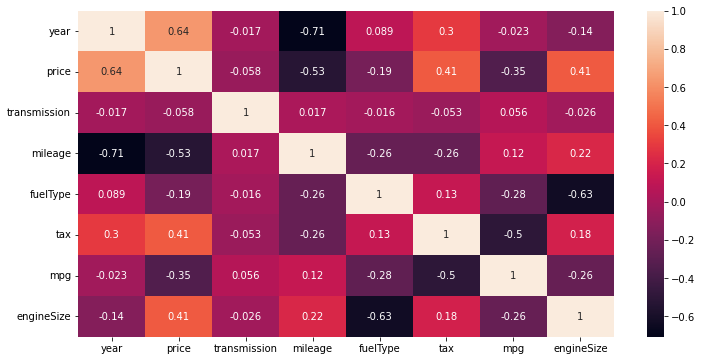

In [23]:
plt.figure(figsize=(12 , 6))
corr = data.corr()
sns.heatmap(corr , annot=True)

In [24]:
x = data.drop("price", axis=1)
y = data["price"]

In [25]:
x_train, x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=0) 

In [26]:
print(x_train.shape)
print(x_test.shape)

(14372, 7)
(3594, 7)


In [27]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [28]:
lg = LinearRegression()
lg.fit(x_train , y_train)

LinearRegression()

In [29]:
lg_pred = lg.predict(x_test)

In [30]:
lg_pred

array([11970.57994705, 10308.61563883, 12421.13432654, ...,
       13449.30359957, 13208.34861258,  5903.81959002])

In [34]:
lg_mse = mean_absolute_error(y_test , lg_pred)

In [39]:
lg_acc = r2_score(y_test , lg_pred)

In [40]:
print("Linear Reg mse " , lg_mse)
print("Linear Reg r2 score" , lg_acc)

Linear Reg mse  1761.6119189452454
Linear Reg r2 score 0.733938547513576


In [41]:
lg_score = cross_val_score(lg , x_test , y_test , cv=4)

In [44]:
lg_score.mean()*100

72.68400648658941

In [45]:
rf = RandomForestRegressor()
rf.fit(x_train , y_train)

RandomForestRegressor()

In [46]:
rf_pred = rf.predict(x_test)

In [47]:
rf_pred

array([11857.38, 10079.5 , 10710.54, ..., 13062.53, 14006.26,  7679.23])

In [48]:
rf_mse = mean_absolute_error(y_test , rf_pred)

In [50]:
rf_acc = r2_score(y_test , rf_pred)

In [54]:
print("Random Forest mse, ", rf_mse)
print("Random Forest R2,", rf_acc)

Random Forest mse,  1005.4334424305059
Random Forest R2, 0.9023781440041602


In [55]:
rf_score = cross_val_score(rf , x_test , y_test , cv=4)

In [58]:
rf_score.mean()*100

88.35852384261588

In [59]:
dt = DecisionTreeRegressor()
dt.fit(x_train , y_train)

DecisionTreeRegressor()

In [60]:
dt_pred = dt.predict(x_test)

In [61]:
dt_pred

array([12400.,  9995., 10999., ..., 14000., 13995.,  7495.])

In [62]:
dt_mse = mean_absolute_error(y_test , dt_pred)

In [63]:
dt_acc = r2_score(y_test , dt_pred)

In [64]:
print("Dec mse, ", dt_mse)
print("Dec R2,", dt_acc)

Dec mse,  1200.914069745873
Dec R2, 0.8586466959623651


In [65]:
dt_score = cross_val_score(dt , x_test , y_test , cv=4)

In [68]:
dt_score.mean()*100

82.00680705634265

In [69]:
data.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000,0,15944,1,150,57.7,1.0
1,2018,14000,1,9083,1,150,57.7,1.0
2,2017,13000,1,12456,1,150,57.7,1.0
3,2019,17500,1,10460,1,145,40.3,1.5
4,2019,16500,0,1482,1,145,48.7,1.0


In [90]:
data = [[2017 , 1 ,7575 ,1, 145 ,57.8 , 1.0]]

In [92]:
rf_pr = rf.predict(data)

In [94]:
print(" The Car price predicted by the Random Forest Model : " , rf_pr)

 The Car price predicted by the Random Forest Model :  [20618.68]


In [95]:
import pickle

In [97]:
file = open("Random Forest.pkl" , "wb")
pickle.dump("rf" ,file)